
# Lab | Cross Validation

For this lab, we will build a model on customer churn binary classification problem. You will be using `files_for_lab/Customer-Churn.csv` file.



### Instructions

1. Apply SMOTE for upsampling the data

    - Use logistic regression to fit the model and compute the accuracy of the model.
    - Use decision tree classifier to fit the model and compute the accuracy of the model.
    - Compare the accuracies of the two models.


2. Apply TomekLinks for downsampling

    - It is important to remember that it does not make the two classes equal but only removes the points from the majority class that are close to other points in minority class.
    - Use logistic regression to fit the model and compute the accuracy of the model.
    - Use decision tree classifier to fit the model and compute the accuracy of the model.
    - Compare the accuracies of the two models.
    - You can also apply this algorithm one more time and check the how the imbalance in the two classes changed from the last time.



In [278]:
# Import the libraries
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')
import os 

import seaborn as sns
import matplotlib.pyplot as plt

In [279]:
%run '/Users/leozinho.air/Desktop/Ironhack/Project 02 - Gentrification/read_analyze_functions.py'

In [280]:
pd.set_option('display.max_rows', False)
pd.set_option('display.max_columns', False)

In [281]:
# Read the data
file_path = '/Users/leozinho.air/Desktop/Ironhack/class_29/lab-cross-validation/files_for_lab/customer_churn.csv'
data = read_analyze(file_path, file_format='csv')


Unique values for gender:
['Female' 'Male']

Unique values for seniorcitizen:
[0 1]

Unique values for partner:
['Yes' 'No']

Unique values for dependents:
['No' 'Yes']

Unique values for tenure:
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

Unique values for phoneservice:
['No' 'Yes']

Unique values for onlinesecurity:
['No' 'Yes' 'No internet service']

Unique values for onlinebackup:
['Yes' 'No' 'No internet service']

Unique values for deviceprotection:
['No' 'Yes' 'No internet service']

Unique values for techsupport:
['No' 'Yes' 'No internet service']

Unique values for streamingtv:
['No' 'Yes' 'No internet service']

Unique values for streamingmovies:
['No' 'Yes' 'No internet service']

Unique values for contract:
['Month-to-month' 'One year' 'Two year']

Unique values for monthlycharges:
[29.85 56.95 5

gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,monthlycharges,totalcharges,churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,No,No,Yes,No,Yes,Yes,Month-to-month,99.65,820.5,Yes
6,Male,0,No,Yes,22,Yes,No,Yes,No,No,Yes,No,Month-to-month,89.10,1949.4,No
7,Female,0,No,No,10,No,Yes,No,No,No,No,No,Month-to-month,29.75,301.9,No
8,Female,0,Yes,No,28,Yes,No,No,Yes,Yes,Yes,Yes,Month-to-month,104.80,3046.05,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [282]:
# Convert 'column1' to numeric float
data['monthlycharges'] = pd.to_numeric(data['monthlycharges'],errors='coerce')

# Convert 'column2' to numeric float
data['totalcharges'] = pd.to_numeric(data['totalcharges'],errors='coerce')

# Check the data types to confirm the conversion
print(data.dtypes)

gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
monthlycharges      float64
totalcharges        float64
churn                object
dtype: object


In [283]:
# Check again for null values
data.isnull().sum().sum() # 11

# Drop them
data = data.dropna()

In [284]:
# X - y split
X = data.drop(['churn'], axis = 1)
y = data['churn']

# Split numerical and categorical
numericalX = X.select_dtypes(include = [np.number])
categoricalX = X.select_dtypes(exclude = [np.number])

# Reset indexes
numericalX.reset_index(drop=True, inplace=True)
categoricalX.reset_index(drop=True, inplace=True)

In [285]:
# One-Hot encoding
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first').fit(categoricalX)
encoded_categorical = encoder.transform(categoricalX).toarray()
encoded_categorical = pd.DataFrame(encoded_categorical)
encoded_categorical.columns = [str(col) if isinstance(col, int) else col for col in encoded_categorical.columns] # colums as strings

# Concat again the data
X = pd.concat([numericalX, encoded_categorical], axis = 1)


In [286]:
# Train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)

X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

# Concat train
train = pd.concat([X_train, y_train],axis=1)
train = train.reset_index(drop = True)

print(train['churn'].value_counts()) #No     4125 Yes    1500 -> imbalanced

display(train)


No     4125
Yes    1500
Name: churn, dtype: int64


,seniorcitizen,tenure,monthlycharges,totalcharges,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,churn
0,0,24,58.35,1346.90,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,No
1,0,71,113.65,8166.80,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,No
2,0,70,25.35,1715.15,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,No
3,0,49,19.45,921.30,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,No
4,0,22,84.15,1821.95,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,No
5,0,8,19.80,160.05,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,No
6,0,3,21.20,52.05,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,No
7,0,24,79.85,2001.00,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,No
8,1,37,36.65,1315.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


### Oversampling

In [287]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_over = train.drop('churn', axis = 1)
y_over = train['churn']

X_sm, y_sm = smote.fit_resample(X_over, y_over)
y_sm.value_counts()


No     4125
Yes    4125
Name: churn, dtype: int64

In [288]:
# Logistic Regression on train oversampled
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter = 100)

# Fit the model
lr.fit(X_sm,y_sm)

# Predictions
from sklearn.metrics import accuracy_score

y_pred = lr.predict(X_sm)
accuracy = accuracy_score(y_sm, y_pred)

print("Accuracy of Logistic Regression: {:.2f}%".format(accuracy * 100)) # 77.02%



Accuracy of Logistic Regression: 77.04%


In [289]:
# Evaluation metrics

from sklearn.metrics import precision_score,recall_score,f1_score,classification_report

# Convert labels to binary -> it was giving me an error since y values were 'Yes' and 'No'
y_sm_binary = (y_sm == 'Yes').astype(int)
y_pred_binary = (y_pred == 'Yes').astype(int)

print("Precision is : ", precision_score(y_sm_binary, y_pred_binary))
print("Recall is : ", recall_score(y_sm_binary, y_pred_binary))
print("F1 is : ", f1_score(y_sm_binary, y_pred_binary)) # 78%

print(classification_report(y_sm_binary, y_pred_binary))


Precision is :  0.7546222323670395
Recall is :  0.8014545454545454
F1 is :  0.7773336468375264
              precision    recall  f1-score   support

           0       0.79      0.74      0.76      4125
           1       0.75      0.80      0.78      4125

    accuracy                           0.77      8250
   macro avg       0.77      0.77      0.77      8250
weighted avg       0.77      0.77      0.77      8250



[[3050 1075]
 [ 819 3306]]


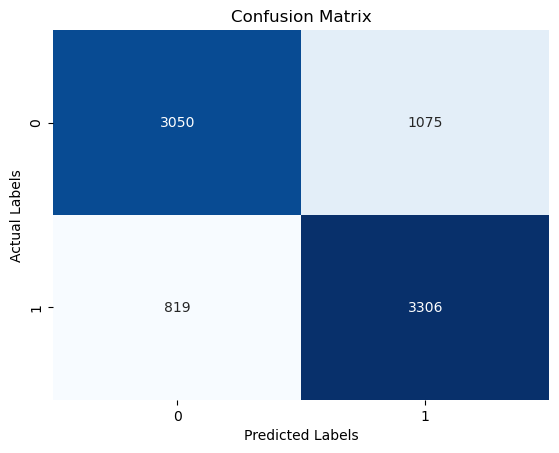

In [290]:
# Visualizing the Confusion Matrix
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_sm_binary, y_pred_binary)

print(conf_matrix)
#[[TN, FP]
#[FN, T1]

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()

In [291]:
# Decision Tree Classifier model
from sklearn.tree import DecisionTreeClassifier 

dtc = DecisionTreeClassifier(criterion = 'entropy',max_depth = 7)
dtc.fit(X_sm, y_sm)

# Predictions
y_pred = dtc.predict(X_sm)
accuracy = accuracy_score(y_sm, y_pred)

print("Accuracy of Logistic Regression: {:.2f}%".format(accuracy * 100)) # 82.74%


Accuracy of Logistic Regression: 83.16%


In [292]:
# Evaluation metrics

from sklearn.metrics import precision_score,recall_score,f1_score,classification_report

# Convert labels to binary -> it was giving me an error since y values were 'Yes' and 'No'
y_sm_binary = (y_sm == 'Yes').astype(int)
y_pred_binary = (y_pred == 'Yes').astype(int)

print("Precision is : ", precision_score(y_sm_binary, y_pred_binary))
print("Recall is : ", recall_score(y_sm_binary, y_pred_binary))
print("F1 is : ", f1_score(y_sm_binary, y_pred_binary)) # 83%

print(classification_report(y_sm_binary, y_pred_binary))


Precision is :  0.8232514177693762
Recall is :  0.8446060606060606
F1 is :  0.8337920306330022
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      4125
           1       0.82      0.84      0.83      4125

    accuracy                           0.83      8250
   macro avg       0.83      0.83      0.83      8250
weighted avg       0.83      0.83      0.83      8250



[[3377  748]
 [ 641 3484]]


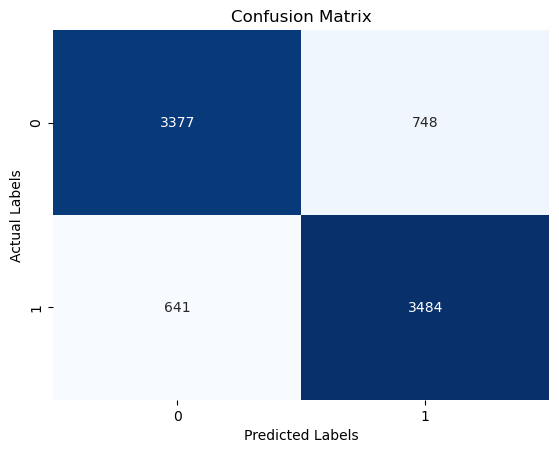

In [293]:
# Visualizing the Confusion Matrix
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_sm_binary, y_pred_binary)

print(conf_matrix)
#[[TN, FP]
#[FN, T1

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()

In [294]:
# K-fold crossvalidation
from sklearn.model_selection import cross_validate

# K fold cross validation
results_lr = cross_validate(lr, X_sm, y_sm, cv = 5)
print("Accuracy mean of logistic model oversampled: " + str(results_lr["test_score"].mean()))
results_dtc = cross_validate(dtc, X_sm, y_sm, cv = 5)
print("Accuracy mean of decision tree model oversampled: " + str(results_dtc["test_score"].mean()))

Accuracy mean of logistic model oversampled: 0.7671515151515151
Accuracy mean of decision tree model oversampled: 0.8031515151515152


### Undersampling

In [295]:
from imblearn.under_sampling import TomekLinks
tl = TomekLinks()
X_tomek = train.drop('churn', axis = 1)
y_tomek = train['churn']

X_tl, y_tl = tl.fit_resample(X_tomek, y_tomek)
y_tl.value_counts()

No     3671
Yes    1500
Name: churn, dtype: int64

In [296]:
# Logistic Regression on train undersampled

lr = LogisticRegression(max_iter = 100)

# Fit the model
lr.fit(X_tl,y_tl)

# Predictions
from sklearn.metrics import accuracy_score

y_pred = lr.predict(X_tl)
accuracy = accuracy_score(y_tl, y_pred)

print("Accuracy of Logistic Regression: {:.2f}%".format(accuracy * 100)) # 81.16%



Accuracy of Logistic Regression: 81.16%


In [297]:
# Evaluation metrics

# Convert labels to binary -> it was giving me an error since y values were 'Yes' and 'No'
y_tl_binary = (y_tl == 'Yes').astype(int)
y_pred_binary = (y_pred == 'Yes').astype(int)

print("Precision is : ", precision_score(y_tl_binary, y_pred_binary))
print("Recall is : ", recall_score(y_tl_binary, y_pred_binary))
print("F1 is : ", f1_score(y_tl_binary, y_pred_binary)) # 66.13%

print(classification_report(y_tl_binary, y_pred_binary)) 


Precision is :  0.6911337209302325
Recall is :  0.634
F1 is :  0.6613351877607788
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      3671
           1       0.69      0.63      0.66      1500

    accuracy                           0.81      5171
   macro avg       0.77      0.76      0.77      5171
weighted avg       0.81      0.81      0.81      5171



[[3246  425]
 [ 549  951]]


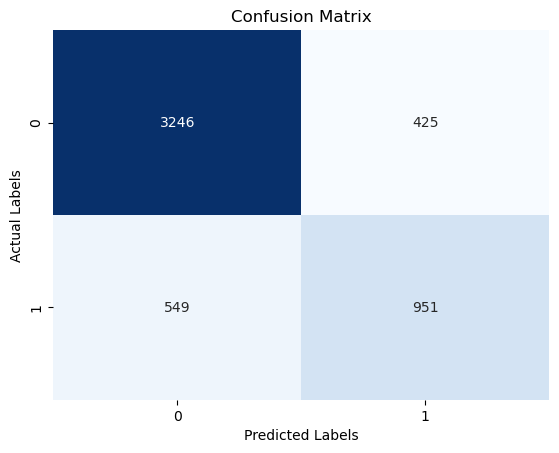

In [298]:
# Visualizing the Confusion Matrix
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_tl_binary, y_pred_binary)

print(conf_matrix)
#[[TN, FP]
#[FN, T1

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()

In [299]:
# Decision Tree Classifier model
dtc = DecisionTreeClassifier(criterion = 'entropy',max_depth = 7)
dtc.fit(X_tl, y_tl)

# Predictions
y_pred = dtc.predict(X_tl)
accuracy = accuracy_score(y_tl, y_pred)

print("Accuracy of Logistic Regression: {:.2f}%".format(accuracy * 100)) # 83.18%

Accuracy of Logistic Regression: 81.98%


In [300]:
# Evaluation metrics

# Convert labels to binary -> it was giving me an error since y values were 'Yes' and 'No'
y_tl_binary = (y_tl == 'Yes').astype(int)
y_pred_binary = (y_pred == 'Yes').astype(int)

print("Precision is : ", precision_score(y_tl_binary, y_pred_binary))
print("Recall is : ", recall_score(y_tl_binary, y_pred_binary))
print("F1 is : ", f1_score(y_tl_binary, y_pred_binary)) # 69.19%

print(classification_report(y_tl_binary, y_pred_binary)) 


Precision is :  0.7362728785357737
Recall is :  0.59
F1 is :  0.6550703182827534
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      3671
           1       0.74      0.59      0.66      1500

    accuracy                           0.82      5171
   macro avg       0.79      0.75      0.77      5171
weighted avg       0.81      0.82      0.81      5171



[[3354  317]
 [ 615  885]]


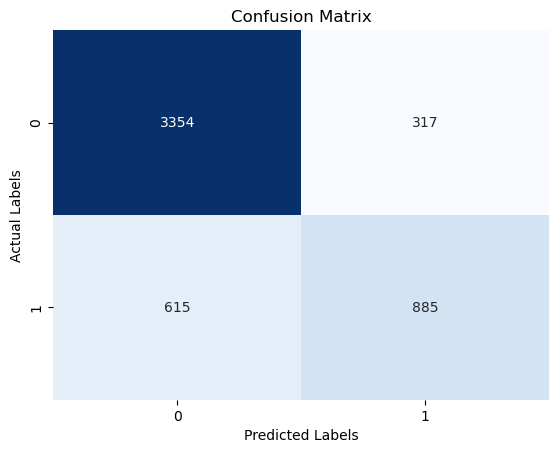

In [301]:
# Visualizing the Confusion Matrix
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_tl_binary, y_pred_binary)

print(conf_matrix)
#[[TN, FP]
#[FN, T1

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()

In [302]:
# Applying TomekLink 2nd time

X_tl2, y_tl2 = tl.fit_resample(X_tl, y_tl)
y_tl2.value_counts()

#No     3519
#Yes    1500

# There is no a relevant change in the class, so i opted to keep just the 1st tomkelink iteration

No     3519
Yes    1500
Name: churn, dtype: int64

In [303]:
# K-fold crossvalidation
from sklearn.model_selection import cross_validate

# K fold cross validation
results_lr = cross_validate(lr, X_tl, y_tl, cv = 5)
print("Accuracy mean of logistic model undersampled: " + str(results_lr["test_score"].mean()))
results_dtc = cross_validate(dtc, X_tl, y_tl, cv = 5)
print("Accuracy mean of decision tree model undersampled: " + str(results_dtc["test_score"].mean()))

Accuracy mean of logistic model undersampled: 0.8120259019426458
Accuracy mean of decision tree model undersampled: 0.7903669441874807


In [304]:
# on average the logistic regression model performs better

## Prediction on test data

In [305]:
# Train test split on the full dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

# Train the Decision Tree Model
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Test the Model
y_pred = lr.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='Yes')
recall = recall_score(y_test, y_pred, pos_label='Yes')
f1 = f1_score(y_test, y_pred, pos_label='Yes')

# Print the evaluation metrics
print("Accuracy: {:.2f}%".format(accuracy * 100)) # 77.90%
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1 Score: {:.2f}%".format(f1 * 100))

# Generate a classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 77.90%
Precision: 60.33%
Recall: 49.20%
F1 Score: 54.20%

Classification Report:
              precision    recall  f1-score   support

          No       0.83      0.88      0.85      1033
         Yes       0.60      0.49      0.54       374

    accuracy                           0.78      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.77      0.78      0.77      1407



In [306]:
# Create a DataFrame to compare actual and predicted labels
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Display the DataFrame
print(comparison_df)

     Actual Predicted
2481     No        No
6784     No        No
6125    Yes       Yes
3052     No        No
4099     No        No
3223     No       Yes
3774     No        No
3469     No       Yes
3420     No        No
...     ...       ...
1367     No        No
1773     No        No
1216     No        No
1428    Yes        No
1733     No        No
5250     No       Yes
5465     No        No
5851     No        No
3984     No        No

[1407 rows x 2 columns]
